In [2]:
import torch
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regression : MSE Loss 

$$y = 1 + 2x_1 + 3x_2$$ 
- 위와 같은 데이터 세팅에서 시작합니다.
- Loss 는 아래와 같이 정의합니다. 
$$MSE_L = (y - f(x)) ^ 2 $$  

In [ ]:
import torch
# 참 계수 준비
w_true = torch.Tensor([1,2,3])
# 데이터 준비
x = torch.cat([torch.ones(100,1),torch.randn(100,2)], dim = 1 )
y = torch.mv(x,w_true) + torch.randn(100) * 0.5 

tensor([1.1506, 2.1246, 3.0570], requires_grad=True)


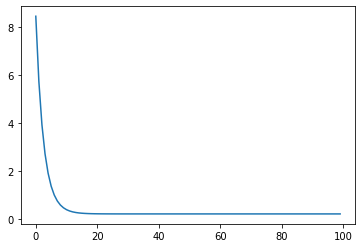

In [30]:
# 기울기 하강 사용하기 위해 w Tensor 에 대해서 require_grad = True
w = torch.randn(3,requires_grad= True)
gamma = 0.1

losses = []
for epoc in range(100) : 
    w.grad = None
    # 선형 모델을 통한 y 예측값 계산
    y_pred = torch.mv(x,w)

    # MSE loss 를 계산한다.
    loss = torch.mean((y-y_pred)**2) #L
    loss.backward()

    # 경사를 갱신함
    # w 를 그대로 대입해 갱신하면 다른 그래프가 되어서 계산 그래프가 망가짐. 그러므로 데이터만 갱신
    w.data = w.data - gamma * w.grad.data
    losses.append(loss.item())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)
print(w)

# Regression : MAE Loss 사용 + with torch.no_grad() 사용

$$y = 1 + 2x_1 + 3x_2$$ 
- 위와 같은 데이터 세팅에서 시작합니다.
- Loss 는 아래와 같이 정의합니다. 
$$MAE_L = abs(y - f(x)) $$  

In [46]:
import torch
# 참 계수 준비
w_true = torch.Tensor([1,2,3])
# 데이터 준비
x = torch.cat([torch.ones(100,1),torch.randn(100,2)], dim = 1 )
y = torch.mv(x,w_true) + torch.randn(100) * 0.5 
w = torch.randn(3,requires_grad= True)

In [57]:
w = torch.randn(3,requires_grad= True)

tensor([0.9792, 2.0906, 3.0818], requires_grad=True)


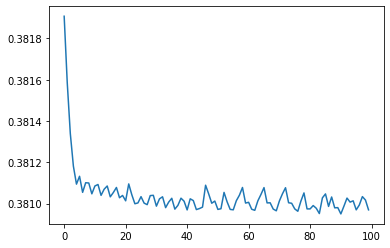

In [59]:
# 기울기 하강 사용하기 위해 w Tensor 에 대해서 require_grad = True
gamma = 0.1

losses = []
for epoc in range(100) : 
    # 선형 모델을 통한 y 예측값 계산
    y_pred = torch.mv(x,w)

    # MSE loss 를 계산한다.
    loss = torch.mean(torch.abs(y-y_pred)) # 절댓값 Loss 사용 
    loss.backward()

    # 경사를 갱신함
    # 데이터만 갱신하는거 귀찮으니까 아래처럼 with 사용하기
    with torch.no_grad():
        # inplace 하게 연산해야 재할당이 이루어지지 않으므로 , gradient 를 읽지 않을 수 있습니다. 
        w -= gamma * w.grad 
    # gradient 초기화
    w.grad.zero_()
    losses.append(loss.item())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)
print(w)

# 모듈 사용하기

In [73]:
import torch
# 참 계수 준비
w_true = torch.Tensor([1,2,3])
# 데이터 준비
x = torch.cat([torch.ones(100,1),torch.randn(100,2)], dim = 1 )
y = torch.mv(x,w_true) + torch.randn(100) * 0.5 
w = torch.randn(3,requires_grad= True)

In [74]:
from torch import nn , optim

# Linear 층을 작성한다. 
# 이때 절편을 회귀 계수에 포함하여서 구하고 있으므로 다음과 같이 설정합니다. 
net = nn.Linear(in_features = 3, out_features = 1 , bias = False )

# SGD. 초기값은 net 의 파라미터를 사용하자. 
optimizer = optim.SGD(net.parameters(), lr = 0.1)

# MSE loss 돌리기
loss_fn = nn.MSELoss()

In [77]:
loss_fn = nn.L1Loss()

[Parameter containing:
tensor([[0.9823, 2.0305, 2.9219]], requires_grad=True)]


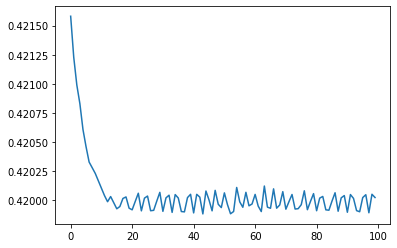

In [78]:
# 기울기 하강 사용하기 위해 w Tensor 에 대해서 require_grad = True
gamma = 0.1

losses = []
for epoc in range(100) : 
    optimizer.zero_grad()
    
    # network 로부터 예측치를 계산함 
    y_pred = net(x)

    # MSE loss 를 계산한다.  
    loss = loss_fn(y_pred.view_as(y),y) 
    
    # 미분 계산해주세요~ 
    loss.backward()
    # 경사 갱신 (net 의 parameter 와 연결되어있기때문에 딱히 input 인자 안받아도 됨)
    optimizer.step()
    
    # gradient 를 초기화 합니다. 
    
    
    # loss 기록하기 
    losses.append(loss.item())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)
print(list(net.parameters()))